# Aprendizaje No Supervisado
### Grupo 23

**Integrantes:** Franco Amilcar Genolet (francogeno97@gmail.com), Fabian Alejandro Zapata Cerutti (fzc501@gmail.com), Luis Alejandro Guedez Gomez (luis.guedez@dicsys.com), María Laura Mantovani (mantovanimlaura@gmail.com).

## Inicialización del entorno

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
#clusters
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

## 1. Análisis exploratorio de la base

Descargamos el archivo y vemos las primeras dos líneas:

In [2]:
#df = pd.read_csv('https://raw.githubusercontent.com/AlejandroGuedez/Equipo-23-de-Diplomado-data-scientist/Versiones/players_22.csv', low_memory=False)

df=pd.read_csv("players_22.csv")
df.head(2)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png


Revisamos las columnas (variables) del dataset:

In [3]:
variables = df.columns.values.tolist()
for v in variables:
    print(v)
print(len(df.columns), 'variables')
print(len(df))

sofifa_id
player_url
short_name
long_name
player_positions
overall
potential
value_eur
wage_eur
age
dob
height_cm
weight_kg
club_team_id
club_name
league_name
league_level
club_position
club_jersey_number
club_loaned_from
club_joined
club_contract_valid_until
nationality_id
nationality_name
nation_team_id
nation_position
nation_jersey_number
preferred_foot
weak_foot
skill_moves
international_reputation
work_rate
body_type
real_face
release_clause_eur
player_tags
player_traits
pace
shooting
passing
dribbling
defending
physic
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties


A diferencia del dataset revisado en clase, que tenía 89 variables, éste tiene 110. Vemos qué tipo de variables son, y evaluamos la proporción de nulos y ceros:

In [4]:
def status(data):

    data2=data 
    # total de rows
    tot_rows=len(data2)
    # total de nan
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'q_nan']
    # percentage of nan
    d2[['p_nan']]=d2[['q_nan']]/tot_rows
    # num of zeros
    d2['q_zeros']=(data2==0).sum().values
    # perc of zeros
    d2['p_zeros']=d2[['q_zeros']]/tot_rows
    # total unique values
    d2['unique']=data2.nunique().values
    # get data types per column
    d2['type']=[str(x) for x in data2.dtypes.values]
    return(d2)
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,sofifa_id,0,0.000000,0,0.0,19239,int64
1,player_url,0,0.000000,0,0.0,19239,object
2,short_name,0,0.000000,0,0.0,18145,object
3,long_name,0,0.000000,0,0.0,19219,object
4,player_positions,0,0.000000,0,0.0,674,object
5,overall,0,0.000000,0,0.0,47,int64
6,potential,0,0.000000,0,0.0,46,int64
7,value_eur,74,0.003846,0,0.0,252,float64
8,wage_eur,61,0.003171,0,0.0,133,float64
9,age,0,0.000000,0,0.0,29,int64


Visualizamos gráficamente los datos faltantes:

nation_jersey_number         18480
nation_team_id               18480
nation_position              18480
nation_logo_url              18480
club_loaned_from             18137
player_tags                  17798
goalkeeping_speed            17107
player_traits                 9841
physic                        2132
defending                     2132
dribbling                     2132
passing                       2132
shooting                      2132
pace                          2132
release_clause_eur            1176
club_joined                   1163
value_eur                       74
league_level                    61
wage_eur                        61
club_team_id                    61
club_name                       61
club_contract_valid_until       61
club_jersey_number              61
club_position                   61
club_logo_url                   61
club_flag_url                   61
league_name                     61


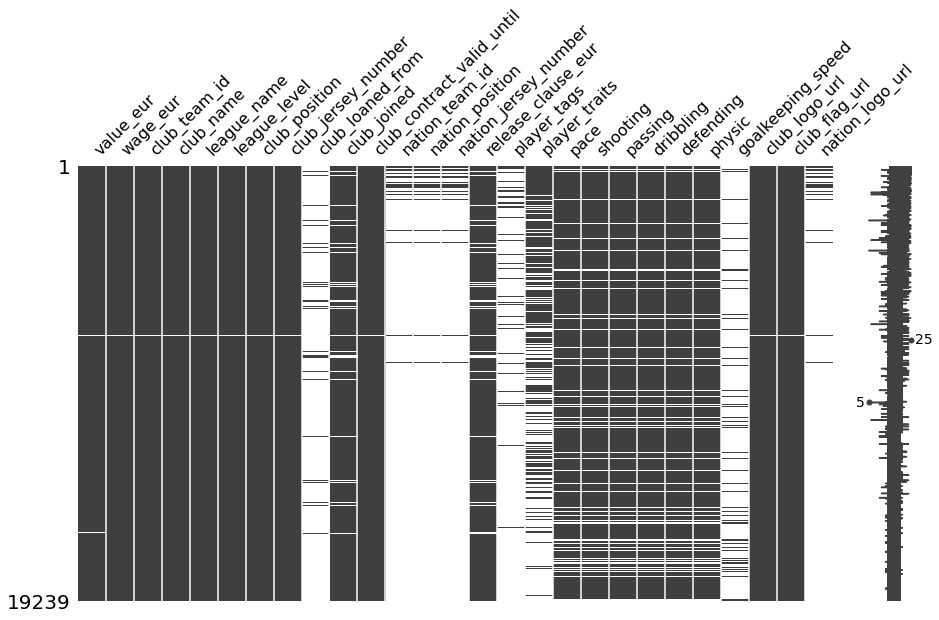

In [5]:
null_values_series = df.isnull().sum().where(lambda x : x > 0).dropna().astype('Int32')
print(null_values_series.sort_values(ascending=False).to_string()) # to_string() removes the name and dtype from the output
msno.matrix(df[null_values_series.index.tolist()], figsize=(15, 8));

Las variables `pace`, `shooting`, `passing`, `dribbling`, `defending` y `physic` tienen 2132 registros nulos. Sospechamos que esto coincide con jugadores cuya única posición es GK (goalkeeper).

In [6]:
len(df.player_positions[df.player_positions == 'GK'])

2132

In [7]:
# Datos de jugadores que solo son GK
interesting_cols = [ 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic' ]
gk = df[df.player_positions == 'GK']
gk[interesting_cols]

,pace,shooting,passing,dribbling,defending,physic
5,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
19210,NaN,NaN,NaN,NaN,NaN,NaN
19216,NaN,NaN,NaN,NaN,NaN,NaN
19225,NaN,NaN,NaN,NaN,NaN,NaN
19227,NaN,NaN,NaN,NaN,NaN,NaN


Confirmamos la sospecha. 

En cuanto a la variable `goalkeeping_speed`, que tiene 17107 valores nulos, ¿será que ésta corresponde a jugadores que nunca juegan como arqueros?

In [8]:
len(df[~df.player_positions.str.contains('GK')])

17107

In [9]:
# Datos de jugadores que nunca son GK
interesting_cols = [ 'goalkeeping_speed' ]
non_gk = df[~df.player_positions.str.contains('GK')]
non_gk[interesting_cols].describe()

,goalkeeping_speed
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


Confirmamos esta otra sospecha. Si queremos incluir estas variables en el análisis, lo más lógico sería separar inicialmente a los arqueros, ya que no se podrá trabajar con esos datos nulos, y naturalmente esperamos que éstos se separen del resto en relación a sus habilidades.

Para los jugadores que no son estrictamente arqueros según la variable `player_positions`, nos enocntramos con que dicha variable puede tener más de una posición por jugador. Si quisiéramos graficar la posición del jugador para entender la relación entre la posición y las habilidades, tenemos que quedarnos con una única posición. 

Pensamos en usar la alternativa `club_position`, pero ésta tiene algunos datos nulos. Para completarla, se decide usar la columna `nation_position`. 

A continuación creamos una columna `position` que contiene los datos de la columna `club_position` combinados con `nation_position` en los casos en los que la anterior es nula.

In [10]:
df['position'] =  df.club_position.combine_first(df.nation_position)

In [11]:
df.head(3)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,position
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,RW
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,ST
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.ne

Con estas posiciones se armaran grupos que luego usaremos para contrastar los clusters que encontremos.

In [12]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
Subtitutes=['SUB']
Reserves=['RES']
goalkeepers=['GK']

def pos2(position):
    if position in forwards:
        return 'Forward'
    
    elif position in midfielders:
        return 'Midfielder'
    
    elif position in defenders:
        return 'Defender'
    
    elif position in goalkeepers:
        return 'GK'
    
    elif position in Subtitutes:
        return 'Substitute'
    
    elif position in Reserves:
        return 'Reserves'
    
    else:
        return 'nan'

In [13]:
df["position_grouped"]=df["position"].apply(lambda x: pos2(x))
non_gk = df[~df.player_positions.str.contains('GK')] #volvemos a definir non_gk incluyendo position y position_grouped
df["position_grouped"].value_counts()

Substitute    8334
Reserves      3168
Defender      2860
Forward       2190
Midfielder    1983
GK             704
Name: position_grouped, dtype: int64

Aquí el total de arqueros/porteros deja de ser 2132. Esto quiere decir que hay jugadores que según `player_positions` son arqueros, pero en su club o en el club de su país están jugando en otra posición. 

In [14]:
interesting_cols = [ 'player_positions', 'club_position', 'nation_position', 'position']
gk_other = df[(df.player_positions == 'GK') & ~(df.position == 'GK') ]
gk_other[interesting_cols]

,player_positions,club_position,nation_position,position
26,GK,SUB,NaN,SUB
143,GK,SUB,NaN,SUB
216,GK,SUB,NaN,SUB
222,GK,SUB,NaN,SUB
243,GK,SUB,NaN,SUB
...,...,...,...,...
19210,GK,SUB,NaN,SUB
19216,GK,RES,NaN,RES
19225,GK,RES,NaN,RES
19227,GK,SUB,NaN,SUB


In [15]:
gk_other.position.value_counts()

SUB    944
RES    484
Name: position, dtype: int64

Como se puede ver, se trata de arqueros/porteros que en su club juegan como arquero/portero suplente o de reserva. Por esta razón, se mantendrá el criterio de quitarlos del análisis al trabajar con clusters, por ser un grupo separado.

A continuación, vemos algunas medidas descriptivas para las variables numéricas:

In [16]:
df.describe() #60 variables numericas

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,19178.000000,19178.000000,19239.000000,759.000000,759.000000,19239.000000,19239.000000,19239.000000,1.806300e+04,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,20.945250,2022.764000,58.602682,14480.848485,12.567852,2.946151,2.352461,1.094184,5.374044e+06,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289,49.577421,45.894433,51.783877,58.867977,42.463849,55.660429,47.268933,42.249025,53.072249,58.472010,64.652893,64.714902,63.500078,61.450023,64.068611,57.776860,64.813504,63.084880,65.007745,46.642705,55.538957,46.613545,50.330215,53.964603,47.858724,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,17.909369,1.213203,50.298614,35328.730217,7.039116,0.671560,0.767659,0.371098,1.494837e+07,10.933155,14.051623,10.068965,9.651312,16.189746,9.791886,18.034661,19.721023,17.294183,14.490858,17.653329,18.784590,18.181085,17.178590,15.026569,16.663722,15.167399,14.965426,14.862285,9.042281,14.324789,13.192224,12.122977,16.145279,12.663518,19.411583,16.972181,20.677077,19.621601,13.650481,15.768583,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,1.000000,2021.000000,1.000000,1318.000000,1.000000,1.000000,1.000000,1.000000,1.600000e+04,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000,6.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,8.000000,14.000000,15.000000,18.000000,25.000000,15.000000,20.000000,22.000000,12.000000,19.000000,4.000000,10.000000,3.000000,2.000000,10.000000,7.000000,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,9.000000,2022.000000,21.000000,1338.000000,7.000000,3.000000,2.000000,1.000000,8.060000e+05,62.000000,42.000000,51.000000,57.000000,37.000000,59.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,35.000000,31.000000,44.000000,55.000000,57.000000,58.000000,55.000000,56.000

El gráfico que sigue muestra la relación entre las variables potencial y salario, en función a la reputación internacional del jugador:

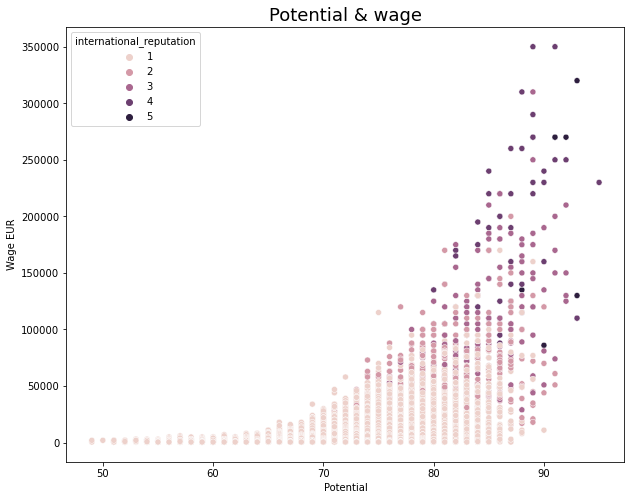

In [17]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x =df['potential'], y = df['wage_eur'], hue = df['international_reputation'])
plt.xlabel("Potential") 
plt.ylabel("Wage EUR")
plt.title("Potential & wage", fontsize = 18)
plt.show()

Como es de esperarse, hay una gran correlacion entre el potencial y el salario cobrado en euros, a medida que la reputacion internacional aumenta, mas salario cobra tambien.

Las variables numéricas, tal como se observó en clase, son en su mayoría discretas. A partir de la variable `pace` y hasta `goalkeeping_speed` son variables numéricas discretas que van de 0 a 100. Estas variables son de desempeño del jugador, y las llamaremos skills_ratings. Dado que todas tienen la misma escala, será innecesario escalar como paso previo al clustering.

Para una primera aproximación global a los jugadores, analizaremos la variable `overall`. Como se vió en clase, esta variable se calcula usando otras variables de desempeño del jugador (skills_ratings), utilizando redondeo. Es decir que puede darnos una idea general de la performance global por jugador. Dicha variable es también numérica discreta, y toma valores enteros entre 0 y 100.

Realizamos el histograma de la variable `overall` (desempeño global):

47


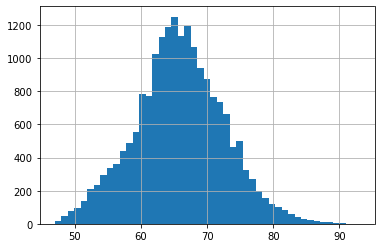

In [18]:
nbins=1*(df.overall.max()-df.overall.min())+1
df['overall'].hist(bins = nbins)
print(nbins)

Veamos la correlacion entre la valoracion general y el salario:

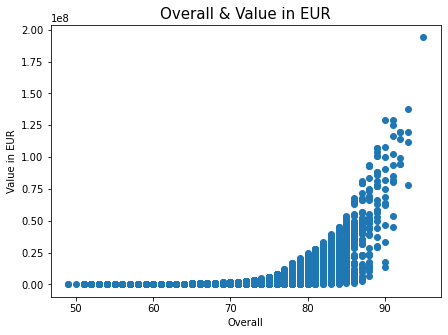

In [19]:
fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(x=df['potential'], y=df['value_eur'] )
plt.xlabel("Overall") 
plt.ylabel("Value in EUR")
plt.title("Overall & Value in EUR", fontsize = 15)
plt.show()

Como tambien era de esperarse, se observa una marcada correlacion entre la valoracion general y el salario

Vemos la distribución de algunas variables puntuales:

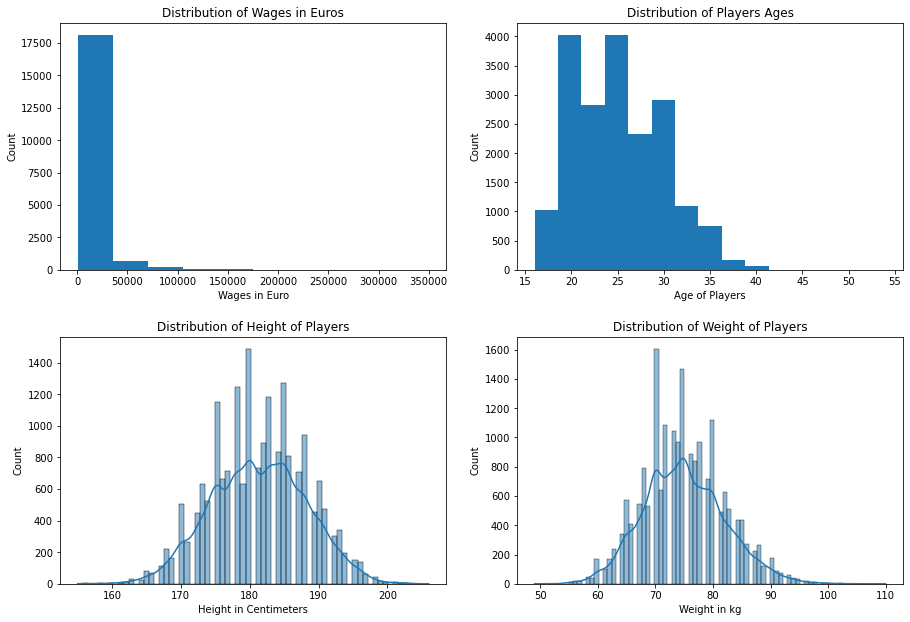

In [20]:

fig, axes = plt.subplots(2, 2, figsize=(13, 9))
axes[0,0].hist(df['wage_eur'])
axes[0,0].set_xlabel('Wages in Euro')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Distribution of Wages in Euros')

axes[0,1].hist(df['age'], bins = 15)
axes[0,1].set_xlabel('Age of Players')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Distribution of Players Ages')

# first two is using a matplotlib syntax, the next two I'll do with seaborn 

axes[1,0].set_title('Distribution of Height of Players')
sns.histplot(df, x='height_cm', ax=axes[1,0], kde=True)
axes[1,0].set_xlabel('Height in Centimeters')
axes[1,0].set_ylabel('Count')


axes[1,1].set_title('Distribution of Weight of Players')
sns.histplot(df, x='weight_kg', ax=axes[1,1], kde=True)
axes[1,1].set_xlabel('Weight in kg')
axes[1,1].set_ylabel('Count')


plt.tight_layout(pad=2)
plt.show()

Se observa que los salarios en Euros son en su mayoría menores a 50k, que la edad de los jugadores se centra entre 20 y 30 años. La altura y el peso de los jugadores tienen distribuciones acampanadas centradas aproximadamente en los 182 cm y los 75kg. 

Veamos de qué nacionalidades son los jugadores de la base:

In [21]:
from collections import Counter
bar_plot = dict(Counter(df['nationality_name'].values).most_common(10))
bar_plot

{'England': 1719,
 'Germany': 1214,
 'Spain': 1086,
 'France': 980,
 'Argentina': 960,
 'Brazil': 897,
 'Japan': 546,
 'Netherlands': 439,
 'United States': 413,
 'Poland': 403}

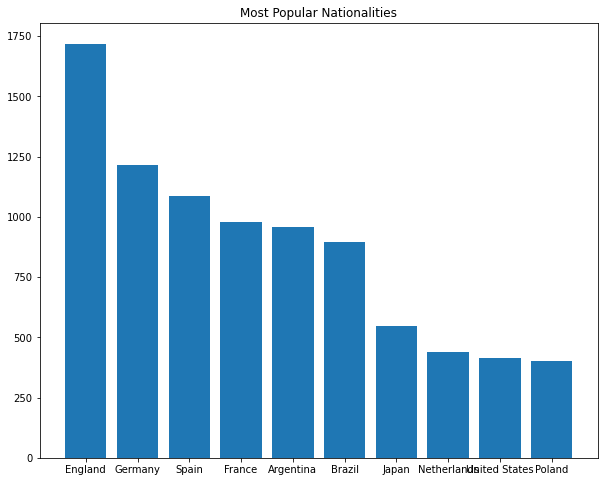

In [22]:
fig, ax = plt.subplots(figsize = (10,8))
plt.bar(*zip(*bar_plot.items()))
ax.set_title('Most Popular Nationalities')
plt.show()

Analicemos ahora el puntaje en función a sus nacionalidades:

In [23]:
stats_rank = df.groupby(['nationality_name']).mean()
print(stats_rank['overall'].sort_values(ascending=False).head(10))

nationality_name
Tanzania                    74.000000
Libya                       73.333333
Mozambique                  73.000000
Central African Republic    72.500000
Egypt                       72.250000
Syria                       72.000000
Fiji                        72.000000
Gabon                       71.166667
Brazil                      70.851728
Czech Republic              70.682692
Name: overall, dtype: float64


Se observa que los puntajes promedio más altos de los jugadores son de países menos populares según se vió en la gráfica anterior. 

Análogamente a como se hizo en clase, miramos ahora los mejores jugadores por su posición. Tomaremos la columna recientemente creada `positions`: 

In [24]:
best_players_per_position=df.iloc[df.groupby(df['position'])['overall'].idxmax()][['position','short_name','overall']]
best_players_per_position.sort_values(by=['overall'], ascending=False).head(10)

,position,short_name,overall
0,RW,L. Messi,93
1,ST,R. Lewandowski,92
3,LW,Neymar Jr,91
4,RCM,K. De Bruyne,91
5,GK,J. Oblak,91
14,CDM,Casemiro,89
11,CF,K. Benzema,89
15,LCB,V. van Dijk,89
19,RDM,J. Kimmich,89
23,RS,L. Suárez,88


Vemos cuántos jugadores hay por cada posición (tomamos la posición que tienen en el club):

In [25]:
count_position = pd.DataFrame(df.position.value_counts().sort_index())
count_position.sort_values(by=['position'], ascending=False).head(10)

,position
SUB,8334
RES,3168
RCB,705
GK,704
LCB,703
RB,517
LB,515
ST,477
LCM,471
RCM,470


Vemos los promedios de la variable `overall` por club (primeros 10):

In [26]:
club_avg_overall=df.groupby("club_name")["overall"].mean().reset_index().sort_values("overall",ascending=False)
club_avg_overall.sort_values(by=['overall'], ascending=False).head(10)

,club_name,overall
368,Juventus,79.961538
470,Paris Saint-Germain,79.454545
358,Inter,78.857143
241,FC Bayern München,78.071429
412,Manchester United,78.000000
509,Real Madrid CF,77.757576
434,Napoli,77.500000
63,Atalanta,77.480000
512,Real Sociedad,77.280000
546,SL Benfica,76.931034


## 2. Evaluación visual  e intuitiva de a dos variables numéricas por vez

Antes de hacer las evaluaciones, se tomara la posicion de los jugadores de la columna club_position ya que en la columna actual de posiciones,
para cada jugador puede tener varias posiciones posible.

Esperamos que los resultados de los goalkeepers (arqueros/porteros) sean diferentes al resto, por lo que antes de analizar visualmente las variables, definiremos a estos dentro de un grupo separado. Para esta definición tomaremos los jugadores que tengan "GK" en la columna `player_positions`, ya que sabemos que en la columna `position` algunos de ellos son suplentes o reserva. Más adelante (una vez generados los clusters), incoporaremos a las gráficas el resto de las posiciones que se definieron en la columna `position_grouped`.

In [27]:
df['gk_new']=df.player_positions.apply(lambda x: 1 if x == 'GK' else 0)
df[['player_positions','gk_new']].head(10)

,player_positions,gk_new
0,"RW, ST, CF",0
1,ST,0
2,"ST, LW",0
3,"LW, CAM",0
4,"CM, CAM",0
5,GK,1
6,"ST, LW",0
7,GK,1
8,GK,1
9,ST,0


Una vez separados los arqueros, armamos el conjunto de skills_ratings:

In [28]:
skills_ratings = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 
                    'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
                    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 
                    'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 
                    'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 
                    'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 
                    'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 
                    'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 
                    'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 
                    'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']

In [29]:
len(skills_ratings)

41

In [30]:
df_skills = df[skills_ratings]

Tenemos 41 variables que queremos ver como se comportan entre sí. Con el siguiente código graficaremos estas 41 variables de a pares. 

In [ ]:
n_cols = 5
n_rows = int((len(skills_ratings)) // n_cols) + (len(skills_ratings) % n_cols > 0)
x = 0
for i, col in enumerate(skills_ratings):
    subplot = 0
    fig = plt.figure(figsize=(30, 40))
    for x in range(i,len(skills_ratings)):
        subplot = subplot + 1
        ax = fig.add_subplot(n_rows, n_cols, subplot)
        ax.set_title(col + ' vs. ' + skills_ratings[x])
        if x == i:
            sns.kdeplot(data=df_skills, x=skills_ratings[i], fill=True)#, hue='')
        else:
            sns.scatterplot(data=df.sample(5200), x=skills_ratings[i], y=skills_ratings[x], hue='gk_new')
    print('*  '*50)
    print(col)
    fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.show()   
    plt.close()

Lo primero que se observa de las gráficas, es que las primeras variables (`pace`, `shooting`, `passing`, `dribbling`, `defending`, y `physic`) no tienen puntos naranjas, que son los que corresponden a los goalkeepers (arqueros/porteros). Ya habíamos mencionado que dichas variables eran nulas para este grupo. Por la misma razón, para estas variables el gráfico de a pares con `goalkeeping_speed` queda vacío. 

Además, los gráficos de variables contra las cuales si se puede cruzar `goalkeeping_speed` solo tienen puntos naranjas (goalkeepers). 

En las gráficas en las que están tanto goalkeepers con el resto de los jugadores, se observa claramente como los primeros se separan del resto. Cabe pensar que la posición en la cancha aporta un dato relevante para el armado de los clusters.



## 3. Técnicas de clustering

Para armar los clusters consideraremos todos aquellos jugadores que no tienen "GK" en la columna `player_positions`. Por lo tanto, la variable `goalkeeping_speed` será excluida de las skills.

In [31]:
skills_ratings_non_gk = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 
                    'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
                    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 
                    'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 
                    'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 
                    'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 
                    'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 
                    'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 
                    'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 
                    'goalkeeping_positioning', 'goalkeeping_reflexes']

In [32]:
non_gk_skills=non_gk[skills_ratings_non_gk]

#### 3.1. Kmeans

Debemos definir la cantidad de clusters. Probemos con 2, 3 y 4 clusters.

In [33]:
#random_state: semilla para garantizar la reproducibilidad de los resultados.
#n_init: determina el número de veces que se va a repetir el proceso, 
# cada vez con una asignación aleatoria inicial distinta. segun documentacion es recomendable que este último valor sea alto, 
# entre 10-25, para no obtener resultados subóptimos debido a una iniciación poco afortunada del proceso.

km_2 = KMeans(n_clusters=2,n_init=25, random_state=123)
km_2.fit(non_gk_skills)
non_gk_skills['kmeans_2'] = km_2.labels_ # Agregamos las etiquetas al df

km_3 = KMeans(n_clusters=3,n_init=25, random_state=123)
km_3.fit(non_gk_skills)
non_gk_skills['kmeans_3'] = km_3.labels_ # Agregamos las etiquetas al df

km_4 = KMeans(n_clusters=4,n_init=25, random_state=123)
km_4.fit(non_gk_skills)
non_gk_skills['kmeans_4'] = km_4.labels_ # Agregamos las etiquetas al df

Antes de repetir las gráficas, veamos los puntajes promedio para cada columna por cluster, según las 3 alternativas que probamos (2, 3 y 4 clusters)

**K-means de 2 clusters**

In [34]:
means_all = non_gk_skills.iloc[:, 0:40].mean()#.map('{:,.0f}'.format)
means_k2 = non_gk_skills.groupby('kmeans_2')[non_gk_skills.columns[0:40]].mean().transpose()
means_k2['total'] = means_all
means_k2['0_vs_total'] = (((means_k2[0] / means_k2['total']) -1)  *100).map('{:,.0f}%'.format)
means_k2['1_vs_total'] = (((means_k2[1] / means_k2['total']) -1)  *100).map('{:,.0f}%'.format)
means_k2[0] = means_k2[0].map('{:,.0f}'.format)
means_k2[1] = means_k2[1].map('{:,.0f}'.format)
means_k2['total'] = means_k2['total'].map('{:,.0f}'.format)
means_k2

kmeans_2,0,1,total,0_vs_total,1_vs_total
pace,73,65,68,7%,-5%
shooting,63,45,52,20%,-14%
passing,59,56,57,3%,-2%
dribbling,67,59,63,7%,-5%
defending,36,63,52,-30%,22%
physic,60,68,65,-7%,5%
attacking_crossing,56,52,54,4%,-3%
attacking_finishing,63,41,50,26%,-19%
attacking_heading_accuracy,54,58,57,-4%,3%
attacking_short_passing,63,63,63,0%,-0%


In [35]:
non_gk_skills.kmeans_2.value_counts()

1    9950
0    7157
Name: kmeans_2, dtype: int64

Al dividir los jugadores (excluyendo arqueros) en dos clusters, se observa que el cluster 1 parece ser más fuerte en defensa, ya que para las 3 habilidades de defensa (`defending_marking_awareness`, `defending_standing_tackle` y `defending_sliding_tackle`), el puntaje promedio de los jugadores es casi el doble de los del cluster 0. Por el contrario, el cluster 1 tiene bajo puntaje promedio para dichas habilidades, y en cambio muestra puntajes más altos para las habilidades más relacionadas con el ataque, como `attacking_volleys`, `attacking_fishing`, `shooting`. Ninguno de los clusters muestra diferencias marcadas para las habilidades relacionadas a goalkeeping. Esto tiene sentido, ya que ninguno de estos jugadores es arquero. Probablemente convenga quitar estas variables para el armado de los clusters, ya que no están aportando información significativa.

**K-means de 3 clusters**

In [36]:
means_k3 = non_gk_skills.groupby('kmeans_3')[non_gk_skills.columns[0:40]].mean().transpose()
means_k3['total'] = means_all
means_k3['0_vs_total'] = (((means_k3[0] / means_k3['total']) -1)  *100).map('{:,.0f}%'.format)
means_k3['1_vs_total'] = (((means_k3[1] / means_k3['total']) -1)  *100).map('{:,.0f}%'.format)
means_k3['2_vs_total'] = (((means_k3[2] / means_k3['total']) -1)  *100).map('{:,.0f}%'.format)
means_k3[0] = means_k3[0].map('{:,.0f}'.format)
means_k3[1] = means_k3[1].map('{:,.0f}'.format)
means_k3[2] = means_k3[2].map('{:,.0f}'.format)
means_k3['total'] = means_k3['total'].map('{:,.0f}'.format)
means_k3

kmeans_3,0,1,2,total,0_vs_total,1_vs_total,2_vs_total
pace,69,62,73,68,1%,-9%,7%
shooting,58,36,62,52,12%,-31%,18%
passing,66,49,57,57,14%,-14%,-1%
dribbling,68,53,66,63,9%,-15%,5%
defending,62,61,32,52,21%,18%,-38%
physic,69,67,59,65,6%,3%,-8%
attacking_crossing,63,45,54,54,17%,-17%,-0%
attacking_finishing,55,32,63,50,10%,-37%,25%
attacking_heading_accuracy,57,58,54,57,2%,3%,-4%
attacking_short_passing,70,58,61,63,11%,-8%,-3%


In [37]:
non_gk_skills.kmeans_3.value_counts()

2    5830
0    5798
1    5479
Name: kmeans_3, dtype: int64

Al dividir en tres clusters, parece que el que antes era el cluster 0 ahora es el 2, y el que antes era el cluster 1 se dividió en 2. El ahora cluster 2 (antes 0) tiene bajo puntaje promedio para las habilidades de defensa, y muestra puntajes más altos para las habilidades más relacionadas con el ataque, como `attacking_volleys`, `attacking_fishing`, `shooting`. Nuevamente ninguno de los clusters muestra diferencias marcadas para las habilidades relacionadas a goalkeeping. 

**K-means de 4 clusters**

In [38]:
means_k4 = non_gk_skills.groupby('kmeans_4')[non_gk_skills.columns[0:40]].mean().transpose()
means_k4['total'] = means_all
means_k4['0_vs_total'] = (((means_k4[0] / means_k4['total']) -1)  *100).map('{:,.0f}%'.format)
means_k4['1_vs_total'] = (((means_k4[1] / means_k4['total']) -1)  *100).map('{:,.0f}%'.format)
means_k4['2_vs_total'] = (((means_k4[2] / means_k4['total']) -1)  *100).map('{:,.0f}%'.format)
means_k4['3_vs_total'] = (((means_k4[3] / means_k4['total']) -1)  *100).map('{:,.0f}%'.format)
means_k4[0] = means_k4[0].map('{:,.0f}'.format)
means_k4[1] = means_k4[1].map('{:,.0f}'.format)
means_k4[2] = means_k4[2].map('{:,.0f}'.format)
means_k4[3] = means_k4[3].map('{:,.0f}'.format)
means_k4['total'] = means_k4['total'].map('{:,.0f}'.format)
means_k4

kmeans_4,0,1,2,3,total,0_vs_total,1_vs_total,2_vs_total,3_vs_total
pace,62,75,71,68,68,-9%,10%,4%,0%
shooting,35,69,57,56,52,-33%,31%,9%,8%
passing,48,65,52,65,57,-15%,14%,-10%,13%
dribbling,52,72,62,67,63,-16%,15%,-1%,7%
defending,61,38,30,64,52,19%,-26%,-41%,24%
physic,67,64,56,69,65,3%,-1%,-14%,6%
attacking_crossing,44,63,48,62,54,-19%,17%,-11%,14%
attacking_finishing,31,69,58,53,50,-38%,37%,16%,5%
attacking_heading_accuracy,59,58,51,58,57,4%,3%,-10%,2%
attacking_short_passing,57,68,57,69,63,-9%,9%,-10%,10%


In [39]:
non_gk_skills.kmeans_4.value_counts()

3    5564
0    5021
2    3548
1    2974
Name: kmeans_4, dtype: int64

Al dividir en cuatro clusters, parece que un porcentaje que conformaba antes el cluster 1 ahora está en el 0. Este cluster se caracteriza por tener bajos puntajes en las habilidades relacionadas con el ataque: `shooting`, `passing`, `dribbling`, `attacking_finishing`, `attacking_volleys`, y `skill_dribbling`, y puntajes mas altos que el promedio en las habilidades de defensa: `defending_marking_awareness`, `defending_standing_tackle` y `defending_sliding_tackle`. 

Considerando cómo fueron cambiando los clusters, y usando el conocimiento de quienes son expertos del dominio, nos parece apropiado tomar 2 clusters, ya que en la interpretación de los resultados parece mas sensato encontrarnos con un grupo de jugadores fuertes en defensa y otro grupo de jugadores fuertes en ataque.

Quitamos las habilidades de goalkeeping:

In [40]:
skills_ratings_non_gk_new = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 
                    'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
                    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 
                    'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 
                    'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 
                    'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 
                    'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 
                    'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 
                    'defending_sliding_tackle']

Veamos gráficamente como quedan los clusters.

In [41]:
non_gk_skills_new=non_gk_skills[skills_ratings_non_gk_new]

km_2_new = KMeans(n_clusters=2)
km_2_new.fit(non_gk_skills_new)
non_gk_skills_new['kmeans_2_new'] = km_2_new.labels_ # Agregamos las etiquetas al df
non_gk['kmeans_2_new'] = km_2_new.labels_ # Agregamos las etiquetas también al df original para ver cómo queda con las posiciones

In [ ]:
n_cols = 5
n_rows = int((len(skills_ratings_non_gk_new)) // n_cols) + (len(skills_ratings_non_gk_new) % n_cols > 0)
x = 0
for i, col in enumerate(skills_ratings_non_gk_new):
    subplot = 0
    fig = plt.figure(figsize=(30, 40))
    for x in range(i,len(skills_ratings_non_gk_new)):
        subplot = subplot + 1
        ax = fig.add_subplot(n_rows, n_cols, subplot)
        ax.set_title(col + ' vs. ' + skills_ratings_non_gk_new[x])
        if x == i:
            sns.kdeplot(data=non_gk_skills_new, x=skills_ratings_non_gk_new[i], fill=True)#, hue='')
        else:
            sns.scatterplot(data=non_gk_skills_new.sample(1000), x=skills_ratings_non_gk_new[i], y=skills_ratings_non_gk_new[x], hue='kmeans_2_new', palette=['blue', 'red'])
    print('*  '*50)
    print(col)
    fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.show()   
    plt.close()


Se observa que hay variables para las cuales los clusters quedan superpuestos, indicando que dichas variables no están aportando información para la agrupación que se analiza. Para algunas variables vistas de a pares, la división es bien clara, por ejemplo: `shooting` vs `passing`, `shotting` vs `defending`, `shotting` vs `attacking_short_passing`, `shotting` vs `mentality_interceptions`, `shotting` vs `defending_marking_awareness`, `shotting` vs `defending_standing_tackle`, `shotting` vs `defendindg_sliding_tackle`, `pacing` vs `defending`, `passing` vs `mentality_interceptions`, etc. Esto nuevamente refuerza la hipótesis de que para cada posición habrá habilidades en las que los distintos jugadores se irán destacando.

Veamos cómo se cruzan los clusters con las posiciones agrupadas

Contrastamos los clusters con las posiciones agrupadas:

In [42]:
pd.crosstab(non_gk.kmeans_2_new,non_gk.position_grouped)

position_grouped,Defender,Forward,Midfielder,Reserves,Substitute
kmeans_2_new,,,,,
0,55,1992,632,1158,3330
1,2805,198,1351,1526,4060


Podemos concluir que al tener una validacion de 2 clusters, se diferencia claramente jugadores que tienen mayores cualidades de atacantes (cluster 1, predominantemente de la posicion Forward) y por otra parte jugadores con mayores cualidades de defensa (cluster 0, predominantemente de la posicion Defender), por lo que realizar la validacion con 2 clusters seria lo correcto.

#### 3.2. MeanShift

En el punto anterior se probó Kmeans con 2, 3 y 4 clusters. La función MeanShift en cambio no requiere que sepamos de antemano cuántos clusters puede ser apropiado para el dataset sino que obtiene una cantidad de clusters.

In [43]:
from numpy import random

ms = MeanShift(bandwidth=43, bin_seeding=True)

ms.fit(non_gk_skills_new)

n_clusters = len(np.unique(ms.labels_))

non_gk_skills_new['ms_clusters'] = ms.labels_ # Agregamos las etiquetas al df
non_gk['ms_clusters'] = ms.labels_ # Tambien al dataframe que contiene las posiciones agrupadas

print("Cantidad de clusters encontrados por MeanShift : %d" % n_clusters)

Cantidad de clusters encontrados por MeanShift : 2


In [44]:
pd.crosstab(non_gk.ms_clusters,non_gk.kmeans_2_new)

kmeans_2_new,0,1
ms_clusters,,
0,973,9938
1,6194,2


MeanShift obtuvo 2 clusters con los parámetros que se fijaron. Esto podría dar más fuerza a nuestra sospecha de que 2 clusters puede ser apropiado para este caso. Además, los jugadores se agruparon en su mayoría de la misma forma. Veamos cómo quedaron con respecto a las posiciones:

In [45]:
pd.crosstab(non_gk.ms_clusters, non_gk.position_grouped)

position_grouped,Defender,Forward,Midfielder,Reserves,Substitute
ms_clusters,,,,,
0,2840,341,1632,1636,4462
1,20,1849,351,1048,2928


Nuevamente el cluster 0 es predominantemente de defensa y el cluster 1 principalmente ataque.

#### 3.3. DBSCAN

Con este método no se obtuvieron clusters. Se probaron distintas alternativas de parámetros y el resultado era 0 clusters o 17107 (cantidad de casos).

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
#dbscan = DBSCAN(eps=20, min_samples=500, metric='euclidean', algorithm='auto', leaf_size=30).fit(non_gk_skills_new)
#non_gk_skills_new['db_clusters'] = dbscan.labels_ # Agregamos las etiquetas al df
#non_gk['db_clusters'] = dbscan.labels_ # Tambien al dataframe que contiene las posiciones agrupadas
#print('DBSCAN encontró ', max(dbscan.labels_)+1, 'clusters, según los hiperparámetros elegidos')

In [ ]:
##pd.crosstab(non_gk.db_clusters,non_gk.kmeans_2_new)

In [ ]:
##pd.crosstab(non_gk.db_clusters,non_gk.ms_clusters)

In [ ]:
##pd.crosstab(non_gk.db_clusters,non_gk.position_grouped)

#### 3.3. Elección justificada de hiper-parámetros

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

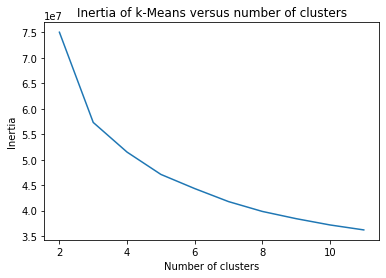

In [46]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(non_gk_skills_new).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

Según este gráfico, la cantidad óptima de clusters parece estar entre 2 y 4.

## 4. Evaluación y Análisis de los clusters encontrados

Podemos concluir segun los resultados alcanzados en los diferentes metodos de clustering, que para los datos presentados de las habilidades de los jugadores resulta válido tener 3 clusters: uno de ellos comprendido por jugadores con caracteristicas de atacantes o que pueden tener mayor impacto en la ofensiva, otro comprendido por jugadores con mayores atribuciones defensivos y un tercer cluster reservado para los GK (arqueros/porteros).

## 5. ¿Se realizó alguna normalización o escalado de la base? ¿Por qué?

No fue necesario realizar normalizacion o escalado ya que los datos tomados en cuenta para esta evaluacion ya se encontraban normalizados del 1 al 100.

## 6. Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering

In [47]:
from sklearn.decomposition import PCA
pre_pca= non_gk_skills_new.copy(deep=True)
pre_pca=pre_pca[skills_ratings_non_gk_new]
n = min(30, pre_pca.shape[1]) 
pca = PCA(n_components=n)
principalComponents = pca.fit_transform(pre_pca)
print(principalComponents.shape)

(17107, 30)


In [48]:
print("Explained variance ratio")
result = pca.explained_variance_ratio_
print(np.round(result,3))

Explained variance ratio
[0.405 0.278 0.089 0.05  0.019 0.017 0.015 0.014 0.012 0.011 0.01  0.008
 0.007 0.007 0.006 0.006 0.005 0.005 0.005 0.004 0.004 0.004 0.004 0.004
 0.003 0.002 0.002 0.002 0.001 0.   ]


Vemos que las primeras 3 componentes explican el 95% de la variabilidad.

In [49]:
pca_df=pd.DataFrame(data= pca.components_, columns = pre_pca.columns, index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30'])
pca_df[skills_ratings_non_gk_new]

,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
PC1,0.110176,0.260156,0.122862,0.154407,-0.199641,-0.044858,0.148834,0.298578,-0.034030,0.077605,0.247212,0.191987,0.217915,0.187337,0.060523,0.130808,0.119802,0.102454,0.157909,0.054631,0.116311,0.193410,-0.038620,0.023374,-0.066899,0.264389,-0.076732,-0.211659,0.246338,0.182933,0.188977,0.089870,-0.203604,-0.230126,-0.237507
PC2,-0.011191,0.072948,0.174825,0.108455,0.302950,0.141630,0.176004,0.029382,0.099268,0.168402,0.064044,0.108300,0.161839,0.161898,0.226174,0.128469,-0.010316,-0.011869,0.042959,0.148795,0.023263,0.123140,0.074462,0.157378,0.103159,0.128620,0.234820,0.343523,0.084001,0.152937,0.040645,0.165055,0.314952,0.328199,0.312426
PC3,-0.267559,0.137739,-0.054443,-0.074657,-0.050706,0.221596,-0.202582,0.140830,0.331816,0.006183,0.143816,-0.087213,-0.064088,-0.021957,-0.043274,0.000119,-0.296277,-0.244356,-0.280919,0.083375,-0.326203,0.174673,0.118977,-0.018571,0.376468,0.114224,0.159997,-0.079980,0.025353,-0.026113,0.161947,0.096188,-0.070168,-0.111865,-0.132942
PC4,-0.357202,0.008174,0.091969,-0.037140,0.015678,-0.251671,0.042847,-0.017321,-0.216673,0.050565,0.019222,-0.026033,0.131686,0.263290,0.154734,-0.009068,-0.322080,-0.386127,-0.159222,-0.084240,-0.019780,0.003729,-0.381196,-0.274233,-0.259389,0.071903,-0.171863,0.036744,-0.053385,0.113698,0.052223,-0.031430,0.024219,0.058956,0.049519
PC5,0.071528,-0.015581,0.104726,0.138054,-0.012000,0.020473,0.092396,0.056637,0.026692,0.183961,-0.124849,0.223528,-0.203824,-0.424587,0.160905,0.193685,0.030588,0.104513,-0.131582,0.089385,-0.336321,-0.065173,-0.536373,-0.000129,0.140241,-0.101800,-0.112886,-0.044041,0.143403,0.144246,-0.173430,0.090340,-0.010237,-0.003359,-0.017880
PC6,0.197026,-0.002592,-0.038975,-0.143615,0.012595,0.130271,0.219327,-0.067756,-0.100344,-0.181447,0.028687,-0.106782,0.271404,0.392437,-0.159627,-0.157313,0.145019,0.239061,-0.146666,-0.138309,-0.375267,0.088192,-0.358420,0.076235,0.272860,0.050235,-0.036106,0.006464,-0.072954,-0.141146,0.043168,-0.157133,0.009622,0.046364,0.045055
PC7,0.057246,0.271889,-0.177293,-0.081653,0.124605,-0.076420,-0.340709,0.328295,-0.111531,-0.136484,0.139441,-0.084937,-0.264968,-0.215229,-0.181110,-0.110859,0.064433,0.051796,-0.019113,-0.070288,0.072205,0.214473,-0.245325,0.113403,-0.175719,0.332931,-0.022177,0.154006,0.108341,-0.049797,0.043428,-0.162010,0.100090,0.193495,0.167297
PC8,0.170128,0.021836,-0.031413,0.033194,0.111233,-0.255407,0.001480,0.017735,0.394615,0.035809,0.181318,0.034477,0.039913,-0.034762,-0.067698,0.077027,0.128230,0.204309,-0.098766,0.102490,-0.136721,0.079571,0.093340,-0.593229,-0.128807,-0.081269,-0.234429,0.028837,-0.124969,-0.170783,0.226788,0.122858,0.078655,0.098237,0.126288
PC9,0.058773,-0.033976,-0.033467,0.034933,-0.062786,0.024405,-0.139402,-0.122110,-0.065584,-0.000824,0.040187,0.026044,0.040286,-0.011439,0.003052,0.018136,0.061754,0.056291,0.079773,-0.005075,0.126491,0.167584,-0.292279,-0.373769,-0.050154,-0.030630,0.788857,-0.067695,-0.096752,-0.034606,-0.076983,0.074371,-0.089752,-0.041879,-0.027177
PC10,0.131842,-0.002416,0.072832,-0.033731,-0.033113,0.027959,-0.495994,-0.091510,-0.089998,0.230748,-0.112343,-0.122546,-0.126899,0.223034,0.432644,0.044089,0.106523,0.152182,0.053960,-0.011155,-0.025214,0.222652,0.001737,0.044683,0.114378,0.114956,-0.203285,-0.044308,-0.435594,0.109115,-0.030704,0.093862,0.005110,-0.035541,-0.062646


<Figure size 1080x360 with 0 Axes>

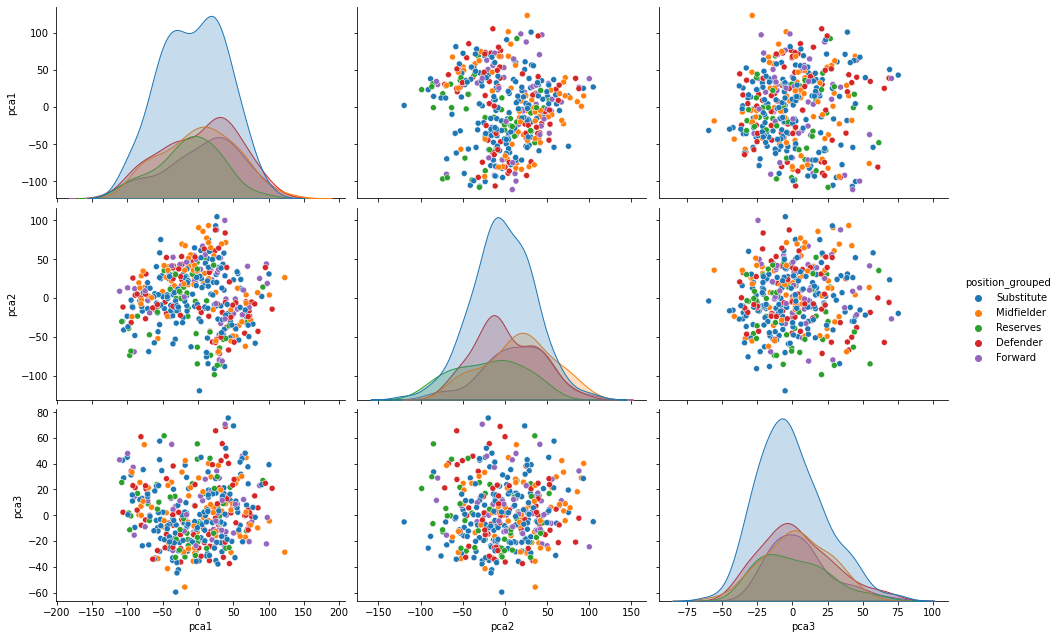

In [50]:
fig = plt.figure(figsize=(15, 5))
df_graficar = pd.DataFrame()
df_graficar[['pca1', 'pca2', 'pca3']] = principalComponents[:,:3]
df_graficar = pd.concat([df_graficar, non_gk['position_grouped']], axis=1)
sns.pairplot(data=df_graficar.sample(500), hue='position_grouped', height=3, aspect= 1.5)

En principio las componentes no están aportando información de variabilidad entre posiciones agrupadas. Veamos cómo resulta en relación a los clusters.

<Figure size 1080x360 with 0 Axes>

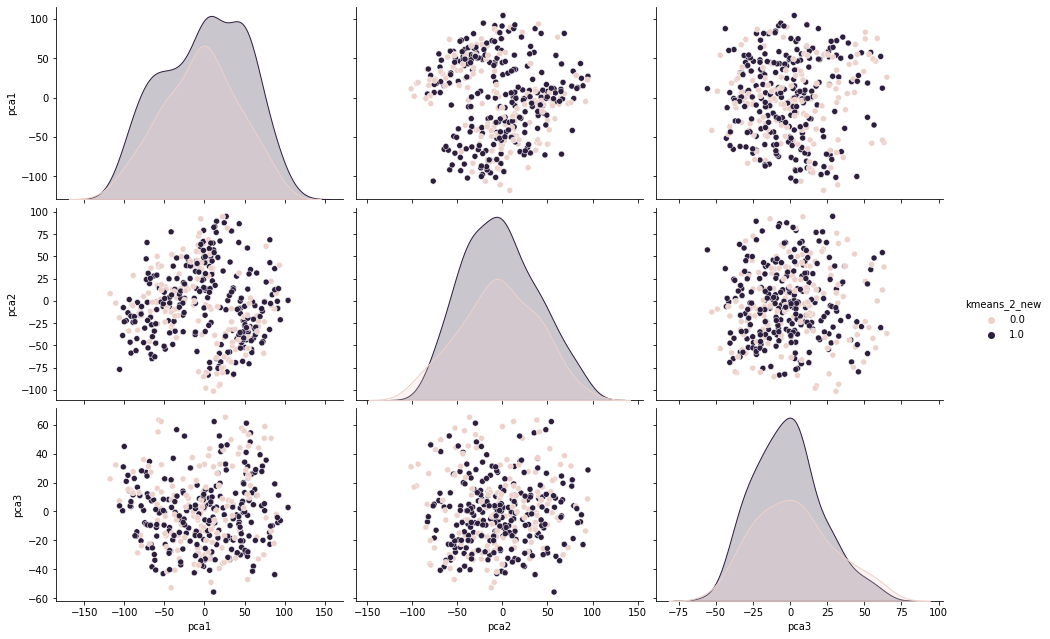

In [51]:
fig = plt.figure(figsize=(15, 5))
df_graficar = pd.DataFrame()
df_graficar[['pca1', 'pca2','pca3']] = principalComponents[:,:3]
df_graficar = pd.concat([df_graficar, non_gk['kmeans_2_new']], axis=1)
sns.pairplot(data=df_graficar.sample(500), hue='kmeans_2_new', height=3, aspect= 1.5)

<Figure size 1080x360 with 0 Axes>

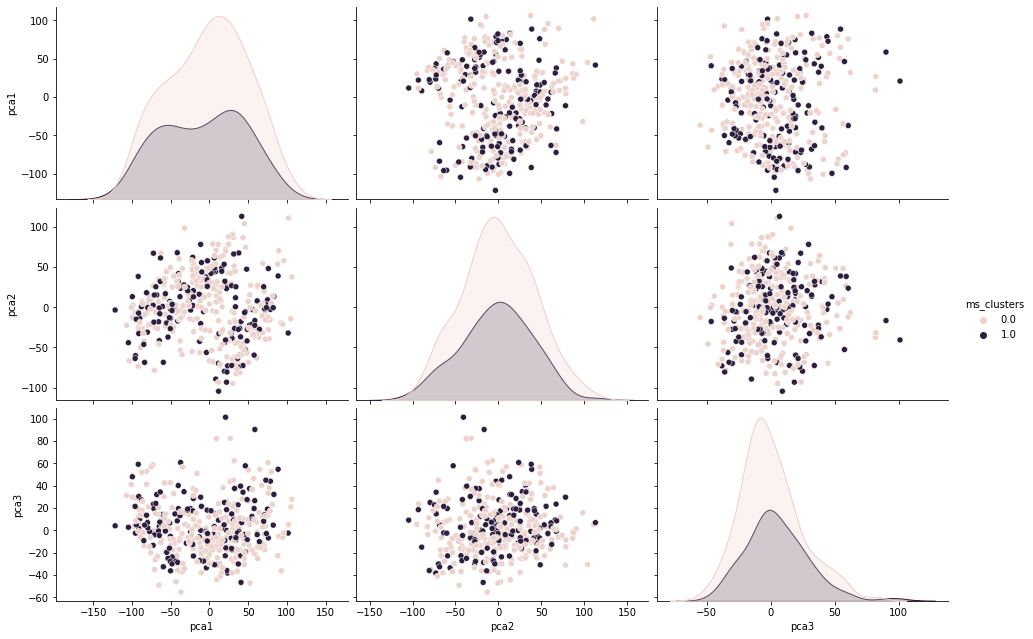

In [52]:
fig = plt.figure(figsize=(15, 5))
df_graficar = pd.DataFrame()
df_graficar[['pca1', 'pca2','pca3']] = principalComponents[:,:3]
df_graficar = pd.concat([df_graficar, non_gk['ms_clusters']], axis=1)
sns.pairplot(data=df_graficar.sample(500), hue='ms_clusters', height=3, aspect= 1.5)

Tampoco parecen estar brindando información acerca de los clusters obtenidos con Kmeans y MeanShift.